In [1]:
# My notes from watching https://www.youtube.com/watch?v=PaCmpygFfXo
# The spelled-out intro to language modeling: building makemore by Andrej Karpathy

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# cast the bigram character level language modeling into neural network framework
# it receives a single character as input, then there is a neural network with some weights(parameters) w
# and then it will output the probability distribution over the next character in the sequence
# which character is likely to follow the input character?

In [4]:
# first create the training set of bigrams (x, y)
# we are given x, we are trying to predict y

xs, ys = [], []

words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}


# finally add the start / end token
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)      

. e
e m
m m
m a
a .


In [5]:
xs

tensor([ 0,  5, 13, 13,  1])

In [6]:
ys

tensor([ 5, 13, 13,  1,  0])

In [7]:
# for "emma", there are 5 separate input examples
# when the input is integer 0, the desired label is integer 5.
# when the input is 5, we want the weights to be arranged so that 13 gets a very high probability
# when 13 is input, we want 13 to have a high probability
# when 13 is input, we also want 1 to have a high probability
# when 1 is input, we want 0 to have a high probability

In [8]:
# there is torch.tensor
# there is torch.Tensor (tensor class that you can construct)
# what's the difference? 
# torch.tensor infers the dtype while torch.Tensor returns a float
# advised that you use torch.tensor

In [9]:
# One Hot Encoding

import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
# we want to cast to float for some reason to feed into the neural net

In [10]:
xenc.shape

torch.Size([5, 27])

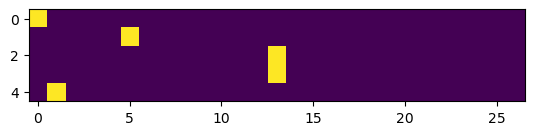

In [11]:
plt.imshow(xenc)

In [12]:
xenc.dtype

torch.float32

In [13]:
# Define the initial weights 
W = torch.randn((27, 1))

# @ is the matrix multiplication operator in PyTorch
xenc @ W

# (5, 27) @ (27, 1) becomes (5, 1)

# We see the 5 activations of this neuron on these 5 inputs. 
# We evaluated all 5 in parallel

tensor([[-0.8759],
        [ 0.1881],
        [-0.7261],
        [-0.7261],
        [-0.8975]])

In [14]:
# Define the initial weights - but now use 27
W = torch.randn((27, 27))

# @ is the matrix multiplication operator in PyTorch
xenc @ W

# (5, 27) @ (27, 27) -> (5, 27)

tensor([[-0.7549, -0.2560,  0.4110, -0.2763, -0.4027, -0.0456,  0.3778, -0.0035,
         -2.2907,  1.5003, -1.1770,  0.9562, -1.2603,  0.9471,  2.2595, -1.4124,
         -0.3648, -0.3643, -0.7721,  0.8234, -0.7387, -0.2529,  1.0256,  0.0266,
         -1.4382,  1.0847,  0.6374],
        [-0.8454, -1.3705,  0.2044,  0.0421, -0.1453,  1.7296,  0.2699,  1.2937,
         -0.7770,  0.6460,  1.0555,  0.5840, -0.6558,  0.1481,  1.1280,  0.4013,
         -1.4661, -0.2125, -1.2857, -0.5621,  0.2863, -0.3678,  1.0126,  1.1377,
          0.0635, -0.5563, -1.2956],
        [ 0.3443,  1.5892, -2.0530, -0.2815, -0.4280, -1.0523,  2.6247, -1.6462,
         -0.0510, -0.2136, -0.4569, -0.3232, -0.8954, -0.8619, -1.6132, -0.3040,
          1.6852, -0.2986,  0.4578,  2.0407,  1.5253, -1.1166,  0.6858,  1.6992,
          0.6451,  0.4714,  1.9416],
        [ 0.3443,  1.5892, -2.0530, -0.2815, -0.4280, -1.0523,  2.6247, -1.6462,
         -0.0510, -0.2136, -0.4569, -0.3232, -0.8954, -0.8619, -1.6132, -0.3040

In [15]:
(xenc @ W).shape

torch.Size([5, 27])

In [16]:
# for every 27 neurons, what is the firing rate 

# example
(xenc @ W)[3, 13] # is giving us the firing rate of the 13th neuron looking at the 3rd input 
# it was achieved using the dot product 

tensor(-0.8619)

In [17]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
W[:,  13]

tensor([ 0.9471,  0.9152,  0.0667, -0.5274, -0.5689,  0.1481, -0.1493,  0.4015,
         0.3164,  0.6870, -2.7756,  0.4780,  0.0194, -0.8619,  0.2691,  0.1839,
        -0.3898, -0.5072, -1.3861, -0.5847, -2.0564,  1.5997,  0.4040, -1.2443,
         0.6524, -0.6651, -1.5207])

In [19]:
(xenc[3] * W[:, 13]).sum() # the dot product

tensor(-0.8619)

In [20]:
# neural net outputs the log counts
# to get the counts, you need to exponentiate the log counts

# exponent (exp(x) 
# element-wise exponent of each, they turn into positive numbers
# all the negative numbers turned into numbers below 1
# all the positive numbers turned into even more positive numbers (above 1)

(xenc @ W).exp()

tensor([[ 0.4700,  0.7742,  1.5083,  0.7586,  0.6685,  0.9555,  1.4591,  0.9965,
          0.1012,  4.4831,  0.3082,  2.6019,  0.2836,  2.5782,  9.5783,  0.2436,
          0.6943,  0.6947,  0.4620,  2.2782,  0.4778,  0.7766,  2.7887,  1.0269,
          0.2374,  2.9585,  1.8916],
        [ 0.4294,  0.2540,  1.2268,  1.0430,  0.8647,  5.6384,  1.3099,  3.6463,
          0.4598,  1.9080,  2.8733,  1.7932,  0.5190,  1.1596,  3.0894,  1.4938,
          0.2308,  0.8086,  0.2765,  0.5700,  1.3316,  0.6923,  2.7528,  3.1195,
          1.0656,  0.5733,  0.2737],
        [ 1.4111,  4.9000,  0.1283,  0.7547,  0.6518,  0.3491, 13.8001,  0.1928,
          0.9503,  0.8077,  0.6332,  0.7238,  0.4084,  0.4224,  0.1993,  0.7378,
          5.3933,  0.7419,  1.5806,  7.6958,  4.5963,  0.3274,  1.9854,  5.4693,
          1.9062,  1.6022,  6.9699],
        [ 1.4111,  4.9000,  0.1283,  0.7547,  0.6518,  0.3491, 13.8001,  0.1928,
          0.9503,  0.8077,  0.6332,  0.7238,  0.4084,  0.4224,  0.1993,  0.7378

In [21]:
logits = xenc @ W # log-counts 
counts = logits.exp() # this is equivalent to N from the bigram notebook
probs = counts / counts.sum(1, keepdims=True) # probabilities are just the counts normalized
probs

tensor([[0.0112, 0.0184, 0.0359, 0.0180, 0.0159, 0.0227, 0.0347, 0.0237, 0.0024,
         0.1066, 0.0073, 0.0619, 0.0067, 0.0613, 0.2278, 0.0058, 0.0165, 0.0165,
         0.0110, 0.0542, 0.0114, 0.0185, 0.0663, 0.0244, 0.0056, 0.0703, 0.0450],
        [0.0109, 0.0064, 0.0311, 0.0265, 0.0219, 0.1431, 0.0332, 0.0925, 0.0117,
         0.0484, 0.0729, 0.0455, 0.0132, 0.0294, 0.0784, 0.0379, 0.0059, 0.0205,
         0.0070, 0.0145, 0.0338, 0.0176, 0.0699, 0.0792, 0.0270, 0.0146, 0.0069],
        [0.0216, 0.0750, 0.0020, 0.0115, 0.0100, 0.0053, 0.2112, 0.0030, 0.0145,
         0.0124, 0.0097, 0.0111, 0.0063, 0.0065, 0.0030, 0.0113, 0.0825, 0.0114,
         0.0242, 0.1178, 0.0703, 0.0050, 0.0304, 0.0837, 0.0292, 0.0245, 0.1067],
        [0.0216, 0.0750, 0.0020, 0.0115, 0.0100, 0.0053, 0.2112, 0.0030, 0.0145,
         0.0124, 0.0097, 0.0111, 0.0063, 0.0065, 0.0030, 0.0113, 0.0825, 0.0114,
         0.0242, 0.1178, 0.0703, 0.0050, 0.0304, 0.0837, 0.0292, 0.0245, 0.1067],
        [0.0224, 0.0194,

In [22]:
# in probs, every row will sum to 1, since they are normalized
probs[0].sum()

tensor(1.0000)

In [23]:
probs.shape
# for every one of our 5 examples, we now have a row that came out of a neural net, and because of the transformations 
# we made sure we can interpret the results to be probabilities



torch.Size([5, 27])

In [24]:
probs[0]
# how likely every one of these characters is to come next in the sequence after '.'

tensor([0.0112, 0.0184, 0.0359, 0.0180, 0.0159, 0.0227, 0.0347, 0.0237, 0.0024,
        0.1066, 0.0073, 0.0619, 0.0067, 0.0613, 0.2278, 0.0058, 0.0165, 0.0165,
        0.0110, 0.0542, 0.0114, 0.0185, 0.0663, 0.0244, 0.0056, 0.0703, 0.0450])

In [25]:
# Can we find a good W so that we get good probabilities?
# 

In [26]:
##### SUMMARY

In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
# randomly initialize 27 neuron's weights. each neuron receives 27 inputs.
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [30]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict the log counts
counts = logits.exp() # get the counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw the last two lines here are together called a 'softmax'

In [31]:
probs.shape

torch.Size([5, 27])

In [32]:

nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('-----')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the neural net to the correct character', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print('=====')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

    
    
    
    
    

-----
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the neural net to the correct character 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
-----
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the neural net to the correct character 0.01

In [33]:
# stopped at 1:31:48

In [ ]:
# We can change the W to get a better or worse model
# To Optimize a neural network
# start with some random guess 
# now we have a loss function (which is made up of only differentiable operations)
# so we can minimize the loss by tuning W 
# by computing the gradients of the loss wrt to the W

# loss is a single number that summarized the performance of the neural net

In [35]:
# we are doing classification so we are using the negative log likelihood

probs.shape

torch.Size([5, 27])

In [36]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [40]:
# to do that in PyTorch we can pass in the integers in a vector

loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

In [45]:
# randomly initialize 27 neuron's weights. each neuron receives 27 inputs.
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [63]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict the log counts
counts = logits.exp() # get the counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [64]:
# backward pass
W.grad = None  # set the gradient to zero (setting to None is more efficient than setting to zero)
loss.backward() # this fills in the gradients to all the intermediates all the way back to W

In [65]:
W.shape

torch.Size([27, 27])

In [66]:
W.grad.shape

torch.Size([27, 27])

In [67]:
W.grad
# every element of W.grad is telling us the influence of that weight on the loss function

# for example, W[0, 0] is 0.0121
# since it is positive it is telling us that it has a positive influence on the loss

tensor([[ 0.0122,  0.0020,  0.0025,  0.0008,  0.0034, -0.1974,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0473,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0291],
        [-0.1969,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0216,  0.0026,
          0.0025,  0.0010,  0.0204,  0.0017,  0.0197,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [68]:
print(loss.item())

3.7291419506073


In [69]:
# we can use the gradient information to update the weights of the neural network
# do the update to the tensor

W.data += -0.1 * W.grad

In [70]:
loss

tensor(3.7291, grad_fn=<NegBackward0>)

In [ ]:
# when we achieve a low loss it will mean that the network is assigning high probabilities to the correct next characters

In [81]:
### Putting it all together

# create the data set
xs, ys = [], []

words = open('names.txt', 'r').read().splitlines()

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)   
num = xs.nelement()
print('number of examples: ', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [83]:
# gradient descent
for k in range(100):
    
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict the log counts
    counts = logits.exp() # get the counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update
   # W.data += -0.1 * W.grad  # -0.1 is the learning rate
    W.data += -50 * W.grad  # try a larger learning rate
    

2.4726529121398926
2.4724340438842773
2.4722204208374023
2.472010850906372
2.4718058109283447
2.4716053009033203
2.4714088439941406
2.4712166786193848
2.4710280895233154
2.470843553543091
2.4706625938415527
2.4704854488372803
2.470311403274536
2.4701414108276367
2.4699745178222656
2.4698104858398438
2.4696500301361084
2.469492197036743
2.4693377017974854
2.4691858291625977
2.4690372943878174
2.468891143798828
2.468747615814209
2.468606472015381
2.468468189239502
2.4683327674865723
2.4681992530822754
2.4680681228637695
2.4679393768310547
2.4678127765655518
2.46768856048584
2.4675662517547607
2.4674463272094727
2.4673285484313965
2.467211961746216
2.467097759246826
2.4669857025146484
2.4668753147125244
2.466766595840454
2.4666597843170166
2.466554641723633
2.466451406478882
2.4663491249084473
2.4662487506866455
2.4661505222320557
2.4660532474517822
2.4659576416015625
2.4658634662628174
2.4657704830169678
2.465679407119751
2.4655892848968506
2.465500593185425
2.4654135704040527
2.46532726

In [ ]:
# what number do we expect to get for the loss?
# similar to what we had originally when we did it by counting (2.47)

In [85]:
# regularization loss
# adds like a spring force that pushes W to be zero in the loss function

(W**2).mean()

tensor(2.1080, grad_fn=<MeanBackward0>)

In [86]:
# finally sample from the neural net model

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    
    out = []
    ix = 0
    while True:
        
        # BEFORE
        # p = P[ix]
        # NOW
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict the log counts
        counts = logits.exp() # get the counts, equivalent to N
        p = counts/ counts.sum(1, keepdims=True) # probabilities for next character
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
        
    print(''.join(out))
        
        

mor.
axwaninaymoryles.
kondlaisah.
anchshizarie.
odaren.
